In [1]:
import pandas as pd
import numpy as np

In [2]:
df_RedditNews = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/RedditNews.csv')
df_DJIA = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/upload_DJIA_table.csv')
df_Combined_News_DJIA = pd.read_csv('https://raw.githubusercontent.com/Eliot100/DJIA-stock-project/main/Combined_News_DJIA.csv')

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

df_DJIA2 = df_DJIA.copy()
df_DJIA2[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']] = \
  scaler.fit_transform(df_DJIA2[['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close']])
  
df_DJIA2.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,0.933579,0.940047,0.939734,0.938290,-0.778698,0.938290
1,2016-06-30,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995
2,2016-06-29,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995
3,2016-06-28,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554
4,2016-06-27,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745


In [4]:
df_Combined = df_DJIA2.copy()
for i in range(0,59):
  df_Combined[str(i+1)+" day before Open"] = ""
  df_Combined[str(i+1)+" day before High"] = ""
  df_Combined[str(i+1)+" day before Low"] = ""
  df_Combined[str(i+1)+" day before Close"] = ""
  df_Combined[str(i+1)+" day before Volume"] = ""
  df_Combined[str(i+1)+" day before Adj Close"] = ""

for i in range(0,25):
  df_Combined["Top"+str(i+1)] = ""

for j in range(0, df_DJIA2.shape[0]-59):
  for i in range(0, 59):
    df_Combined[str(i+1)+" day before Open"][j] = df_Combined["Open"][j+i+1]
    df_Combined[str(i+1)+" day before High"][j] = df_Combined["High"][j+i+1]
    df_Combined[str(i+1)+" day before Low"][j] = df_Combined["Low"][j+i+1]
    df_Combined[str(i+1)+" day before Close"][j] = df_Combined["Close"][j+i+1]
    df_Combined[str(i+1)+" day before Volume"][j] = df_Combined["Volume"][j+i+1]
    df_Combined[str(i+1)+" day before Adj Close"][j] = df_Combined["Adj Close"][j+i+1]

for i in range(0,25):
  df_Combined["Top"+str(i+1)] = ""

for i in range(0, df_DJIA2.shape[0]):
  News_Date_array = df_RedditNews[df_RedditNews["Date"] == df_Combined["Date"][i]]["News"].to_numpy()
  for j in range(0, News_Date_array.shape[0]):
    df_Combined["Top"+str(j+1)][i] = News_Date_array[j]

df_Combined = df_Combined[:-59]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipyk

In [5]:
df_Combined.head(2)

,Date,Open,High,Low,Close,Volume,Adj Close,1 day before Open,1 day before High,1 day before Low,1 day before Close,1 day before Volume,1 day before Adj Close,2 day before Open,2 day before High,2 day before Low,2 day before Close,2 day before Volume,2 day before Adj Close,3 day before Open,3 day before High,3 day before Low,3 day before Close,3 day before Volume,3 day before Adj Close,4 day before Open,4 day before High,4 day before Low,4 day before Close,4 day before Volume,4 day before Adj Close,5 day before Open,5 day before High,5 day before Low,5 day before Close,5 day before Volume,5 day before Adj Close,6 day before Open,6 day before High,6 day before Low,...,57 day before Close,57 day before Volume,57 day before Adj Close,58 day before Open,58 day before High,58 day before Low,58 day before Close,58 day before Volume,58 day before Adj Close,59 day before Open,59 day before High,59 day before Low,59 day before Close,59 day before Volume,59 day before Adj Close,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2016-07-01,0.933579,0.940047,0.939734,0.938290,-0.778698,0.938290,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745,0.937385,0.930469,0.844743,0.845029,-0.308067,0.845029,0.919961,0.94154,0.927397,...,0.899512,-0.782119,0.899512,0.876177,0.893533,0.878559,0.87149,-0.70386,0.87149,0.870893,0.887156,0.873858,0.874984,-0.78521,0.874984,A 117-year-old woman in Mexico City finally re...,IMF chief backs Athens as permanent Olympic host,"The president of France says if Brexit won, so...",British Man Who Must Give Police 24 Hours' Not...,100+ Nobel laureates urge Greenpeace to stop o...,Brazil: Huge spike in number of police killing...,Austria's highest court annuls presidential el...,"Facebook wins privacy case, can track any Belg...",Switzerland denies Muslim girls citizenship af...,China kills millions of innocent meditators fo...,France Cracks Down on Factory Farms - A viral ...,Abbas PLO Faction Calls Killer of 13-Year-Old ...,Taiwanese warship accidentally fires missile t...,"Iran celebrates American Human Rights Week, mo...",U.N. panel moves to curb bias against L.G.B.T....,"The United States has placed Myanmar, Uzbekist...",S&amp;P revises European Union credit rating t...,India gets $1 billion loan from World Bank for...,U.S. sailors detained by Iran spoke too much u...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...
1,2016-06-30,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745,0.937385,0.930469,0.844743,0.845029,-0.308067,0.845029,0.919961,0.94154,0.927397,0.948778,-0.730957,0.948778,0.918017,0.925922,0.9149,...,0.87149,-0.70386,0.87149,0.870893,0.887156,0.873858,0.874984,-0.78521,0.874984,0.893308,0.885914,0.866414,0.869034,-0.754812,0.869034,Jamaica proposes marijuana dispensers for tour...,Stephen Hawking says pollution and 'stupidity'...,Boris Johnson says he will not run for Tory pa...,Six gay men in Ivory Coast were abused and for...,Switzerland denies citizenship to Muslim immig...,Palestinian terrorist stabs israeli teen girl ...,Puerto Rico will default on $1 billion of debt...,Republic of Ireland fans to be awarded medal f...,Afghan suicide bomber 'kills up to 40' - BBC News,US airstrikes kill at least 250 ISIS fighters ...,Turkish Cop Who Took Down Istanbul Gunman Hail...,Cannabis compounds could treat Alzheimer's by ...,Japan'

In [6]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sna = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [7]:
df_Combined2 = df_Combined.copy()
for i in range(0, df_Combined2.shape[0]):
  News_Date_array = df_RedditNews[df_RedditNews["Date"] == df_Combined2["Date"][i]]["News"].to_numpy()

  for j in range(0, 25):
    df_Combined2["Top"+str(j+1)][i] = sna.polarity_scores(df_Combined2["Top"+str(j+1)][i])["compound"]
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_final = df_Combined2.drop(['Date', 'High', 'Low', 'Volume', 'Adj Close'], axis=1)
X_df = df_final.drop(['Close'], axis=1)
Y_df = df_final['Close']

In [10]:
df_final.head(2)

,Open,Close,1 day before Open,1 day before High,1 day before Low,1 day before Close,1 day before Volume,1 day before Adj Close,2 day before Open,2 day before High,2 day before Low,2 day before Close,2 day before Volume,2 day before Adj Close,3 day before Open,3 day before High,3 day before Low,3 day before Close,3 day before Volume,3 day before Adj Close,4 day before Open,4 day before High,4 day before Low,4 day before Close,4 day before Volume,4 day before Adj Close,5 day before Open,5 day before High,5 day before Low,5 day before Close,5 day before Volume,5 day before Adj Close,6 day before Open,6 day before High,6 day before Low,6 day before Close,6 day before Volume,6 day before Adj Close,7 day before Open,7 day before High,...,57 day before Close,57 day before Volume,57 day before Adj Close,58 day before Open,58 day before High,58 day before Low,58 day before Close,58 day before Volume,58 day before Adj Close,59 day before Open,59 day before High,59 day before Low,59 day before Close,59 day before Volume,59 day before Adj Close,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,0.933579,0.938290,0.897638,0.927717,0.904977,0.934995,-0.626052,0.934995,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745,0.937385,0.930469,0.844743,0.845029,-0.308067,0.845029,0.919961,0.94154,0.927397,0.948778,-0.730957,0.948778,0.918017,0.925922,...,0.899512,-0.782119,0.899512,0.876177,0.893533,0.878559,0.87149,-0.70386,0.87149,0.870893,0.887156,0.873858,0.874984,-0.78521,0.874984,-0.5574,-0.0516,0.5719,-0.8658,-0.296,-0.4404,-0.3182,0.5612,-0.7351,-0.2732,-0.8402,-0.6486,-0.4767,0.1779,-0.1027,-0.5859,0.3818,0,-0.4019,-0.3182,-0.9509,-0.3818,-0.9618,-0.9432,0
1,0.897638,0.934995,0.854005,0.888874,0.861634,0.894995,-0.706021,0.894995,0.808881,0.838231,0.816642,0.846554,-0.688587,0.846554,0.836872,0.828866,0.795049,0.800745,-0.608918,0.800745,0.937385,0.930469,0.844743,0.845029,-0.308067,0.845029,0.919961,0.94154,0.927397,0.948778,-0.730957,0.948778,0.918017,0.925922,0.9149,0.90964,-0.756853,0.90964,0.917109,0.918651,...,0.87149,-0.70386,0.87149,0.870893,0.887156,0.873858,0.874984,-0.78521,0.874984,0.893308,0.885914,0.866414,0.869034,-0.754812,0.869034,0,-0.4141,0.4019,-0.8934,-0.6124,-0.91,-0.3612,0.7003,-0.8402,-0.7096,0.6705,0.4019,-0.5423,0,-0.3182,0.7351,0,-0.7579,-0.3182,0,-0.9578,0,-0.872,-0.5423,-0.875


In [25]:
x_train, x_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.3, random_state=1)
import tensorflow as tf

In [12]:
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()

In [22]:
y_train = np.array(y_train,ndmin=2)

In [14]:
features = x_train.shape[1]
x = tf.placeholder(tf.float32, shape=[x_train.shape[0],x_train.shape[1]])
y_ = tf.placeholder(tf.float32, shape=[y_train.shape[0],y_train.shape[1]])
W = tf.Variable(tf.zeros([features,1]))
b = tf.Variable(tf.zeros([1]))
predict = tf.matmul(x,W) + b
loss = tf.reduce_mean(tf.pow(predict - y_, 2))
update = tf.train.GradientDescentOptimizer(0.005).minimize(loss)
data_x = x_train.to_numpy()
data_y = y_train

In [15]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [16]:
for i in range(0,5000):
    sess.run(update, feed_dict = {x:data_x, y_:data_y})
    # if i+1 % 10 == 0 :
    #     print('Iteration:' , i+1 , ' W(1->5):' , sess.run(W[0:5]) , ' b:' , sess.run(b), ' loss:', loss.eval(session=sess, feed_dict = {x:data_x, y_:data_y}))

In [26]:
y_test = np.array(y_test, ndmin=2)
x_test_p = tf.placeholder(tf.float32, shape=[None,x_test.shape[1]])
y_test_p = tf.placeholder(tf.float32, shape=[None,y_test.shape[1]])
predict = tf.matmul(x_test_p,W) + b
loss = tf.reduce_mean(tf.pow(predict - y_test_p, 2))

In [29]:
sess.run(loss, feed_dict = {x_test_p: x_test, y_test_p: y_test})

0.28245166

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.3, random_state=1)

In [34]:
# https://stackoverflow.com/questions/40994583/how-to-implement-tensorflows-next-batch-for-own-data
def next_batch(num, data, labels):
    data['y'] = labels
    data = data.sample(num)
    data_shuffle = data.sample(num)
    labels_shuffle = np.array(data['y'], ndmin=2)
    return np.asarray(data_shuffle), np.asarray(labels_shuffle).reshape((data.shape[0], 1))

In [36]:
batch_size = 579
step_size = 0.001
(hidden1_size, hidden2_size, hidden3_size, hidden4_size) = (248, 138, 24, 8)

x = tf.placeholder(tf.float32, shape=[batch_size, x_train.shape[1]])
y_ = tf.placeholder(tf.float32, shape=[batch_size, 1])

W1 = tf.Variable(tf.truncated_normal([x_train.shape[1], hidden1_size], stddev=0.1))
b1 = tf.Variable(tf.constant(0.01, shape=[hidden1_size]))
z1 = tf.nn.relu(tf.matmul(x,W1)+b1)

# W2 = tf.Variable(tf.truncated_normal([hidden1_size, 1], stddev=0.1))
# b2 = tf.Variable(tf.constant(0.1, shape=[1]))
W2 = tf.Variable(tf.truncated_normal([hidden1_size, hidden2_size], stddev=0.1))
b2 = tf.Variable(tf.constant(0.1, shape=[hidden2_size]))
z2 = tf.nn.relu(tf.matmul(z1,W2)+b2)

# W3 = tf.Variable(tf.truncated_normal([hidden2_size, 1], stddev=0.1))
# b3 = tf.Variable(tf.constant(0.1, shape=[1]))
W3 = tf.Variable(tf.truncated_normal([hidden2_size, hidden3_size], stddev=0.1))
b3 = tf.Variable(tf.constant(0.01, shape=[hidden3_size]))
z3 = tf.nn.relu(tf.matmul(z2,W3)+b3)

# W4 = tf.Variable(tf.truncated_normal([hidden3_size, 1], stddev=0.1))
# b4 = tf.Variable(tf.constant(0.01, shape=[1]))
W4 = tf.Variable(tf.truncated_normal([hidden3_size, hidden4_size], stddev=0.1))
b4 = tf.Variable(tf.constant(0.01, shape=[hidden4_size]))
z4 = tf.nn.relu(tf.matmul(z3,W4)+b4)

W5 = tf.Variable(tf.truncated_normal([hidden4_size, 1], stddev=0.1))
b5 = tf.Variable(tf.constant(0.01, shape=[1]))

predict = tf.matmul(z4,W5) + b5
# predict = tf.matmul(z3,W4) + b4
# predict = tf.matmul(z2,W3) + b3
# predict = tf.matmul(z1,W2) + b2

loss = tf.reduce_mean(tf.pow(predict - y_, 2))
train_step = tf.train.GradientDescentOptimizer(step_size).minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
train_losses = []
sess.run(init)
test_losses = []
for i in range (100):
    for _ in range(200):
      batch_xn, batch_yn = next_batch(batch_size, x_train, y_train)
      sess.run(train_step, feed_dict={x: batch_xn, y_: batch_yn})
    batch_xn, batch_yn = next_batch(batch_size, x_train, y_train)
    temp_loss = sess.run(loss, feed_dict={x: batch_xn, y_: batch_yn})
    train_losses.append(temp_loss)
    batch_xt, batch_yt = next_batch(batch_size, x_test, y_test)
    temp_loss = sess.run(loss, feed_dict={x: batch_xt, y_: batch_yt})
    test_losses.append(temp_loss)
    print('iter', i+1, temp_loss)
    step_size *= 0.99

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


iter 1 0.2947359
iter 2 0.28567693
iter 3 0.28338236
iter 4 0.28231
iter 5 0.28209975
iter 6 0.28208604
iter 7 0.28218302
iter 8 0.28205222
iter 9 0.28217328
iter 10 0.28224736
iter 11 0.28249815
iter 12 0.28267607
iter 13 0.28249085
iter 14 0.28255174
iter 15 0.28224912
iter 16 0.2821881
iter 17 0.2825649
iter 18 0.2825306
iter 19 0.28254694
iter 20 0.28231648
iter 21 0.2824623
iter 22 0.28230643
iter 23 0.2826784
iter 24 0.28222692
iter 25 0.28239933
iter 26 0.28232503
iter 27 0.28232673
iter 28 0.28267694
iter 29 0.28229734
iter 30 0.28242612
iter 31 0.28231642
iter 32 0.2824884
iter 33 0.28239584
iter 34 0.28271833
iter 35 0.2822526
iter 36 0.28232825
iter 37 0.2825732
iter 38 0.2822637
iter 39 0.2821864
iter 40 0.28232428
iter 41 0.2821775
iter 42 0.282241
iter 43 0.28230745
iter 44 0.28241476
iter 45 0.28283435
iter 46 0.28244823
iter 47 0.28241372
iter 48 0.28250974
iter 49 0.2824609
iter 50 0.28243452
iter 51 0.2824773
iter 52 0.28231075
iter 53 0.28252944
iter 54 0.28278524
it

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

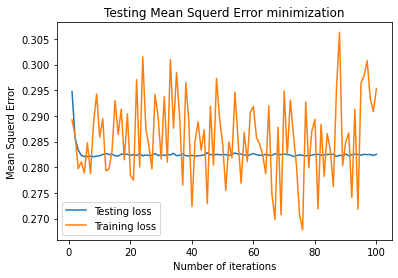

In [38]:
iter = np.arange(1,101)
plt.title('Testing Mean Squerd Error minimization')
plt.plot(iter, test_losses, label='Testing loss')
plt.plot(iter, train_losses, label='Training loss')
plt.legend()
plt.xlabel('Number of iterations')
plt.ylabel('Mean Squerd Error')
plt.show()